In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

#Pyhon'da uyarıları kapalatım 
import warnings
warnings.filterwarnings("ignore")

In [2]:
veri=pd.read_csv("athlete_events.csv")

In [22]:
veri.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [7]:
veri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 20.7+ MB


In [3]:
veri.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

In [4]:
#sütun isimlerini değistirelim
veri.rename(columns={'ID' : 'id',
                     'Name'   : 'isim',
                     'Gender' : 'cinsiyet',
                     'Age'    : 'yas',
                     'Height' : 'boy',
                     'Weight' : 'kilo',
                     'Team'   : 'takim',
                     'NOC'    : 'uok',
                     'Games'  : 'oyunlar',
                     'Year'   : ' yil',
                     'Season' : 'sezon',
                     'City'   : 'sehir',
                     'Event'  : 'etkinlik',
                     'Sex'    : 'cinsiyet',
                     'Sport'  : 'brans',
                     'Medal'  : 'madalya'}, inplace=True)
veri.head(2)

,id,isim,cinsiyet,yas,boy,kilo,takim,uok,oyunlar,yil,sezon,sehir,brans,etkinlik,madalya
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN


In [18]:
# drop fonksiyonu ile id ve  oyunlarını çıkarıyoruz
veri= veri.drop(["id","oyunlar"], axis=1) #axis=1 sütun anlamında
veri.head(5)

,isim,cinsiyet,yas,boy,kilo,takim,uok,yil,sezon,sehir,brans,etkinlik,madalya
0,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [19]:
veri.head()

,isim,cinsiyet,yas,boy,kilo,takim,uok,yil,sezon,sehir,brans,etkinlik,madalya
0,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [5]:
essiz_etkinlik= pd.unique(veri.etkinlik)
print("Eşsiz etkinliksayısı:{}".format(len(essiz_etkinlik)))
essiz_etkinlik[:10]

Eşsiz etkinliksayısı:765


array(["Basketball Men's Basketball", "Judo Men's Extra-Lightweight",
       "Football Men's Football", "Tug-Of-War Men's Tug-Of-War",
       "Speed Skating Women's 500 metres",
       "Speed Skating Women's 1,000 metres",
       "Cross Country Skiing Men's 10 kilometres",
       "Cross Country Skiing Men's 50 kilometres",
       "Cross Country Skiing Men's 10/15 kilometres Pursuit",
       "Cross Country Skiing Men's 4 x 10 kilometres Relay"], dtype=object)

In [ ]:
# herbir etkinliği iteratif olarak dolaş
# etkinlik özelinde boy ve kilo ortalamalarını hesapla
# etkinlik özelinde kayıp boy ve kilo geğerlerini etkinlik ortalamalarına eşitle

veri_gecici= veri.copy() # gerçek veriyi bozmamak için bir kopyasını alalım 
boy_kilo_liste= ["boy","kilo"]

for e in essiz_etkinlik: # liste içerisinde dolaş

    # etkinlik filtresini oluşturalım
    etkinlik_filtre = veri_gecici.etkinlik == e
    # veriyi etkinliğe göre filtreyelim
    veri_filtreli = veri_gecici[etkinlik_filtre]

    # boy ve kilo için etkinlik özelinde ortalamaları hesaplayalım 
    for s in boy_kilo_liste:
        ortalama = np.round(np.mean(veri_filtreli[s]),2)
        if ~np.isnan(ortalama): # eger  etkinlik özelinde ortalama varsa 
            veri_filterli[s] = veri_filterli[s].fillna(ortalama)
        else: # eger etkinlik özelinde ortalama varsa ortalamayı hesapla
            tum_veri_ortalamasi = np.round(np.mean(veri[s]),2)
            veri_filtreli[s] = veri_filtereli[s].fillna(tum_veri_ortalamasi)
     # etkinlik özelinde kayıp degerleri doldurulmuş olan veriyi veri_gecici'ye eşitle 
     veri_gecici[etkinlik_filtre] = veri_filtreli

# kayıp degerleri giderilmiş olan geçici veriyi gerçek veriye eşitleyelim
veri= veri_gecici.copy()
veri.info() # boy ve kilo sütunlarında kayıp deger sayısına bakalım


In [7]:
# yas değişkeninde tanımlı olmayan değerleri bulalım 
yas_ortalamasi = np.round(np.mean(veri.yas),2)
print("Yaş Ortalaması: {}".format(yas_ortalamasi))
veri["yas"]= veri["yas"].fillna(yas_ortalamasi)
veri.info()


Yaş Ortalaması: 25.56
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   id        271116 non-null  int64  
 1   isim      271116 non-null  object 
 2   cinsiyet  271116 non-null  object 
 3   yas       271116 non-null  float64
 4   boy       210945 non-null  float64
 5   kilo      208241 non-null  float64
 6   takim     271116 non-null  object 
 7   uok       271116 non-null  object 
 8   oyunlar   271116 non-null  object 
 9    yil      271116 non-null  int64  
 10  sezon     271116 non-null  object 
 11  sehir     271116 non-null  object 
 12  brans     271116 non-null  object 
 13  etkinlik  271116 non-null  object 
 14  madalya   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 20.7+ MB


In [8]:
madalya_degiskeni= veri["madalya"]
pd.isnull(madalya_degiskeni).sum()

231333

In [9]:
madalya_degiskeni_filtresi= ~pd.isnull(madalya_degiskeni)

In [11]:
veri=veri[madalya_degiskeni_filtresi]
veri.head(5)

,id,isim,cinsiyet,yas,boy,kilo,takim,uok,oyunlar,yil,sezon,sehir,brans,etkinlik,madalya
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
37,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
38,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
40,16,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.0,Finland,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
41,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze


In [12]:
veri.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39783 entries, 3 to 271103
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        39783 non-null  int64  
 1   isim      39783 non-null  object 
 2   cinsiyet  39783 non-null  object 
 3   yas       39783 non-null  float64
 4   boy       31072 non-null  float64
 5   kilo      30456 non-null  float64
 6   takim     39783 non-null  object 
 7   uok       39783 non-null  object 
 8   oyunlar   39783 non-null  object 
 9    yil      39783 non-null  int64  
 10  sezon     39783 non-null  object 
 11  sehir     39783 non-null  object 
 12  brans     39783 non-null  object 
 13  etkinlik  39783 non-null  object 
 14  madalya   39783 non-null  object 
dtypes: float64(3), int64(2), object(10)
memory usage: 3.3+ MB


In [16]:
# sonradan kullanabilmek için veriyi kaydedelim 
veri.to_csv("olimpiyatlar-temizlenmis.csv", index= False)

In [30]:
# öncelikli olarak histogram grafiklerini çizdireceğimiz fonksiyonu yazalım 
def plotHistogram(degisken):
    """
      Girdi: Degisken/sütun ismi
      Çıktı: İlgili degiskenin histogramı
    """
    plt.figure()
    plt.hist(veri[degisken], bins = 85, color = "orange")
    plt.xlabel(degisken)
    plt.ylabel("Frekans")
    plt.title("Veri Sıklığı - {}".format(degisken))
    plt.show()

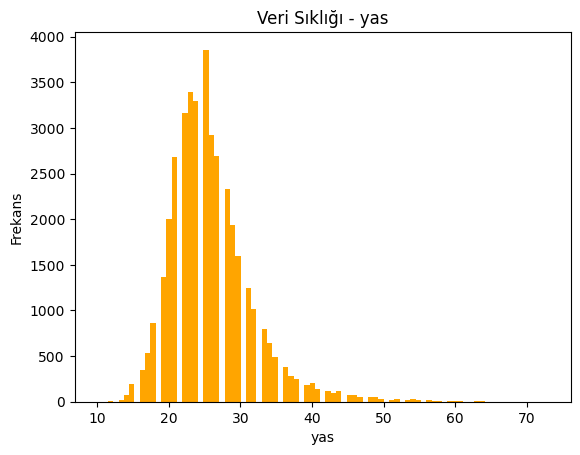

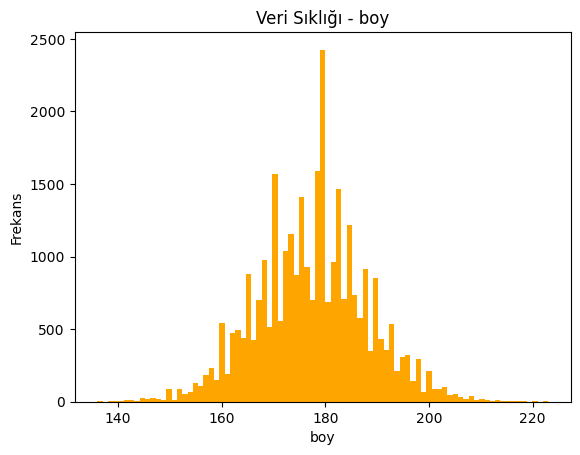

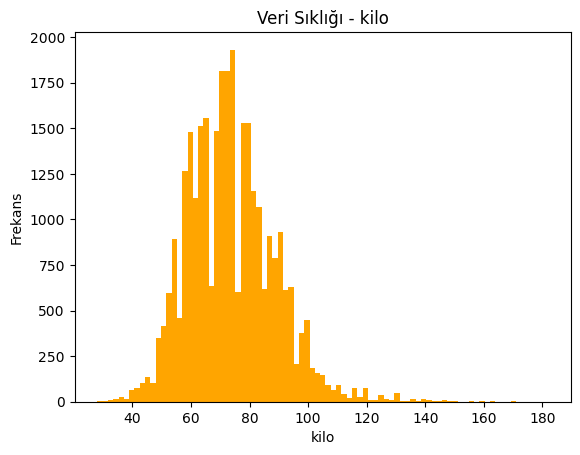

<Figure size 640x480 with 0 Axes>

<class 'KeyError'>: 'yil'

In [34]:
# tüm sayısal degişkenler için histogramları çizdirelim 
sayısal_degisken= ["yas", "boy", "kilo", "yil"]
for i in sayısal_degisken:
    plotHistogram (i)

In [36]:
veri.describe()

,id,yas,boy,kilo,yil
count,39783.000000,39783.000000,31072.000000,30456.000000,39783.000000
mean,69407.051806,25.918456,177.554197,73.770680,1973.943845
std,38849.980737,5.859569,10.893723,15.016025,33.822857
min,4.000000,10.000000,136.000000,28.000000,1896.000000
25%,36494.000000,22.000000,170.000000,63.000000,1952.000000
50%,68990.000000,25.000000,178.000000,73.000000,1984.000000
75%,103461.500000,29.000000,185.000000,83.000000,2002.000000
max,135563.000000,73.000000,223.000000,182.000000,2016.000000
